In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
titanic = pd.read_csv('titanic-train.csv')
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic['Age'].fillna(value=np.mean(titanic.Age),inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

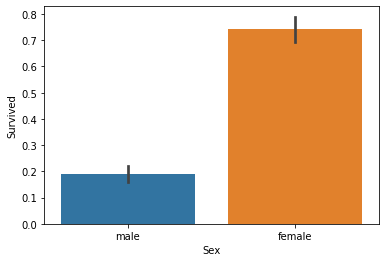

In [5]:
sns.barplot(titanic.Sex,titanic.Survived)

In [6]:
titanic.Survived.unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

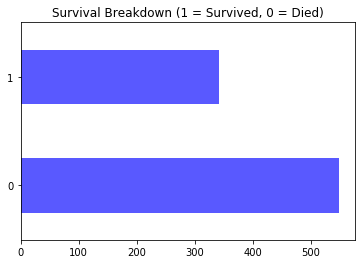

In [7]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
titanic.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

<Figure size 720x720 with 0 Axes>

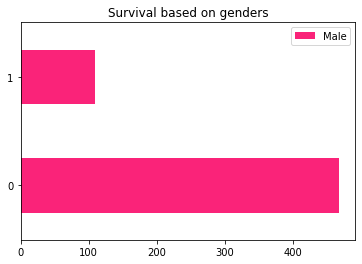

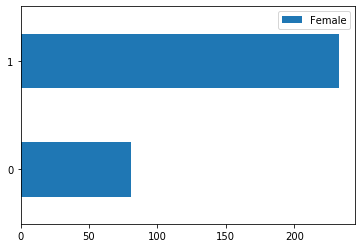

In [8]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots()
titanic.Survived[titanic.Sex == 'male'].value_counts().sort_index().plot(kind='barh',label='Male',color='#FA2379')
plt.legend()
plt.title("Survival based on genders")
fig,ax2=plt.subplots()
titanic.Survived[titanic.Sex == 'female'].value_counts().sort_index().plot(kind='barh',label='Female')
plt.legend()

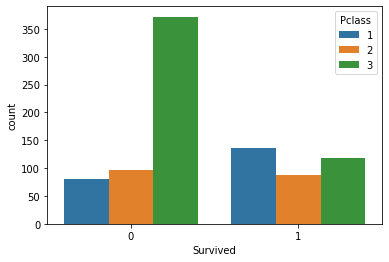

In [32]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

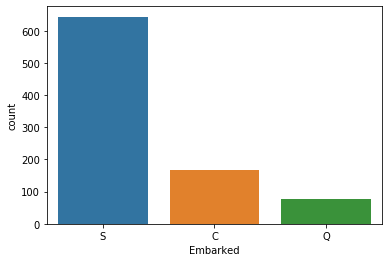

In [34]:
sns.countplot(titanic['Embarked'])

In [9]:
#Handling categorical values
df1=pd.get_dummies(titanic['Sex'],drop_first=True)
titanic_new=pd.concat([titanic,df1],axis=1)
titanic_new.drop('Sex',axis=1,inplace=True)
titanic_new.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [22]:
df1=pd.get_dummies(titanic['Pclass'],drop_first=True)
titanic_new1=pd.concat([titanic_new,df1],axis=1)
titanic_new1.drop('Pclass',axis=1,inplace=True)
titanic_new1.head()
titanic_new1.rename(columns={2:'Pclass_2',3:'Pclass_3'},inplace=True)
titanic_new1.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,1


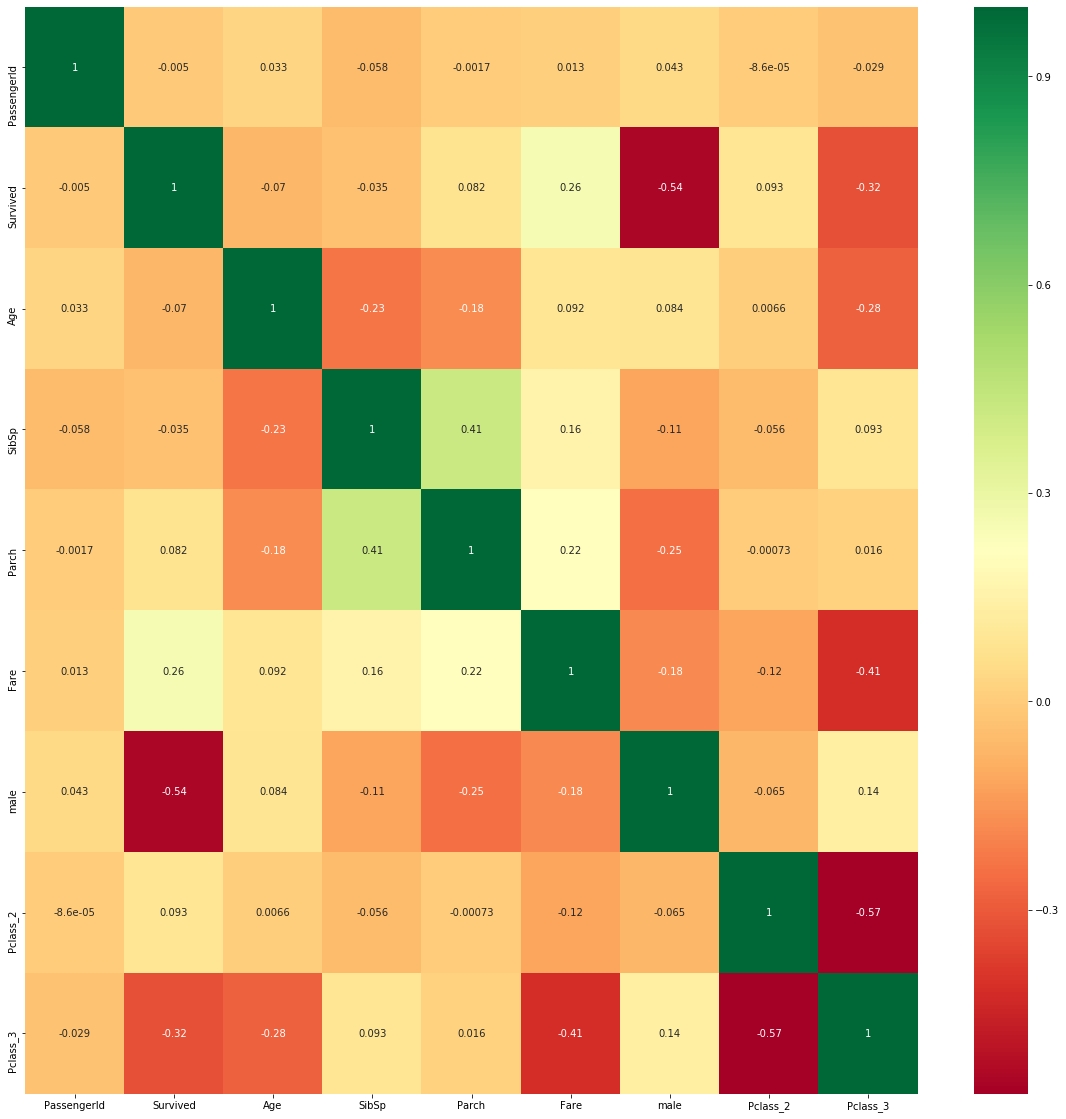

In [23]:
corm=titanic_new1.corr()
features=corm.index
plt.figure(figsize=(20,20))
g=sns.heatmap(corm,annot=True,cmap='RdYlGn')

In [24]:
x=titanic_new1[['Age','SibSp','Parch','Fare','male','Pclass_2','Pclass_3']]
y=titanic_new1['Survived']
x.head()

,Age,SibSp,Parch,Fare,male,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,0
4,35.0,0,0,8.0500,1,0,1


In [25]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_transform=scale.fit_transform(x)
x_transform

array([[-0.5924806 ,  0.43279337, -0.47367361, ...,  0.73769513,
        -0.51015154,  0.90258736],
       [ 0.63878901,  0.43279337, -0.47367361, ..., -1.35557354,
        -0.51015154, -1.10792599],
       [-0.2846632 , -0.4745452 , -0.47367361, ..., -1.35557354,
        -0.51015154,  0.90258736],
       ...,
       [ 0.        ,  0.43279337,  2.00893337, ..., -1.35557354,
        -0.51015154,  0.90258736],
       [-0.2846632 , -0.4745452 , -0.47367361, ...,  0.73769513,
        -0.51015154, -1.10792599],
       [ 0.17706291, -0.4745452 , -0.47367361, ...,  0.73769513,
        -0.51015154,  0.90258736]])

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x_transform,y,test_size=0.2,random_state=42)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(712, 7) (712,)
(179, 7) (179,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(tree,grid_param,cv=5)
gridsearch.fit(xtrain,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         

In [42]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 6, 'splitter': 'random'}
0.8328651685393258


In [56]:
tree=DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=3, min_samples_split= 6, splitter='random')
tree.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score
ypred=tree.predict(xtest)
accuracy_score(ytest,ypred) * 100

80.44692737430168

So,we could predict whether the passenger has survived or now with 80 % accuracy which is a pretty good result.